In [2]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import time

import warnings
warnings.filterwarnings('ignore')

- Here "best_face_model.pt" is the best selfie model you trained on Colab. Remember, it should be in *"/content/yolov5/runs/train/exp/weights/best.pt"* directory in Colab. I just downloaded it from there to our directory.

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/erkara/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-14 Python-3.11.2 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7982MiB)



[Errno 2] No such file or directory: '/home/erkara/anaconda3/envs/face/lib/python3.11/site-packages/pyparsing-3.0.9.dist-info/METADATA'


Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


- Recall that prediction object in YOLOv5 contains useful methods to extract information from the detected objects. Some of the common methods available in the results object are:

            results.pred: A tensor containing the raw predictions for each object detected in the image. Each row represents an object and contains [x1, y1, x2, y2,    confidence, class] values.

            results.xyxy: A list of tensors, one for each input image, containing the same information as results.pred.

            results.xywh: Similar to results.xyxy, but the bounding box coordinates are in [x_center, y_center, width, height] format.

            results.xyxyn: Similar to results.xyxy, but the coordinates are normalized between 0 and 1, relative to the input image dimensions.

            results.names: A list of class names for the detected objects, corresponding to the classes in your dataset.

            results.render(): This method returns the input image with bounding boxes, labels, and confidence scores drawn on it.

            results.print(): This method prints the text output of the detection results, including class names and confidence scores.

            results.save(): This method saves the rendered image to a file. You can pass the output directory and other optional parameters.

            results.show(): This method displays the rendered image using matplotlib.

            results.pandas(): This method returns a Pandas DataFrame containing the detection results. You can choose the box format (xyxy, xywh, or xywhn) and whether to include the class names or not.

# Inspect Images

In [7]:
sample_img = 'yolov5/selfie-data/test/images/IMG_0930_jpg.rf.d3ff543f66f575d7a94e01c4dce88370.jpg'

In [8]:
result = model(sample_img)

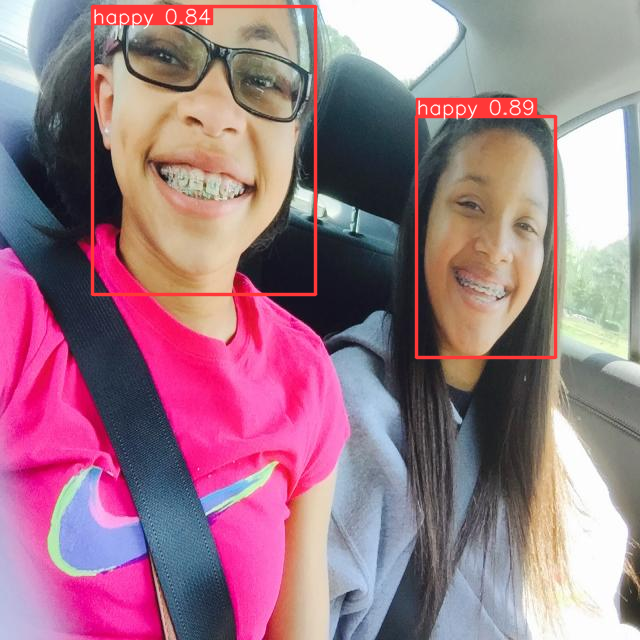

In [9]:
result.show()

# Process Video or Camera Feed In Real Time

In [14]:
#access already saved video
#cap = cv2.VideoCapture('video.mp4')

#access camera
cap = cv2.VideoCapture(0)
fps = int(cap.get(cv2.CAP_PROP_FPS))
print("Press 'c' to save the frame when you're happy with your pose.")
print("Press 'q' to quit.")
print("After saving a frame, press 's' to stop saving more frames, or press any other key to continue.")

counter = 0
while True:
    # grab a single frame from the camera
    ret, frame = cap.read()
    
    frame_ID = cap.get(1)

    # Display the raw camera frame for better pose adjustments
    cv2.imshow('Camera Feed', frame)

    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Capture the frame when you press 'c'
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        image_name = f"selfie_{counter}.jpg"
        cv2.imwrite(image_name, frame)
      
        print("Frame saved:", image_name)
        
        print("Press 's' to stop saving more frames, or press any other key to continue.")
        key = cv2.waitKey(0) & 0xFF
        if key == ord('s'):
            break
        
        counter += 1

    # check if the user has pressed the 'q' key to quit
    if key == ord('q'):
        break

# release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


Press 'c' to save the frame when you're happy with your pose.
Press 'q' to quit.
After saving a frame, press 's' to stop saving more frames, or press any other key to continue.
Frame saved: selfie_0.jpg
Press 's' to stop saving more frames, or press any other key to continue.
